# IMDb Movies
This notebook analyses a subset of 5,043 IMDb movies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set up matplotlib and seaborn
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
# Read the movies data in from an Excel file using tab as the delimiter
df = pd.read_csv('../data_files/imdb_movies.csv', encoding='utf-8', sep='\t')

In [4]:
# Check content of the dataframe
df.head()

,num_recs,actor_1_facebook_likes,actor_1_name,actor_2_facebook_likes,actor_2_name,actor_3_facebook_likes,actor_3_name,aspect_ratio,budget,cast_total_facebook_likes,...,imdb_score,language,movie_facebook_likes,movie_imdb_link,movie_title,num_critic_for_reviews,num_user_for_reviews,num_voted_users,plot_keywords,title_year
0,1,1000.0,CCH Pounder,936.0,Joel David Moore,855.0,Wes Studi,1.78,237000000.0,4834,...,7.9,English,33000,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,AvatarÂ,723.0,3054.0,886204,avatar|future|marine|native|paraplegic,2009.0
1,1,40000.0,Johnny Depp,5000.0,Orlando Bloom,1000.0,Jack Davenport,2.35,300000000.0,48350,...,7.1,English,0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,Pirates of the Caribbean: At World's EndÂ,302.0,1238.0,471220,goddess|marriage ceremony|marriage proposal|pi...,2007.0
2,1,11000.0,Christoph Waltz,393.0,Rory Kinnear,161.0,Stephanie Sigman,2.35,245000000.0,11700,...,6.8,English,85000,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,SpectreÂ,602.0,994.0,275868,bomb|espionage|sequel|spy|terrorist,2015.0
3,1,27000.0,Tom Hardy,23000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,2.35,250000000.0,106759,...,8.5,English,164000,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,The Dark Knight RisesÂ,813.0,2701.0,1144337,deception|imprisonment|lawlessness|police offi...,2012.0
4,1,131.0,Doug Walker,12.0,Rob Walker,NaN,NaN,NaN,NaN,143,...,7.1,NaN,0,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,Star Wars: Episode VII - The Force AwakensÂ ...,NaN,NaN,8,NaN,NaN


## Data Analysis
Let's understand the data more by doing some provisional analysis.

In [5]:
# Check the data columns, datatypes and indication of column's data presence/absence
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_recs                   5043 non-null   int64  
 1   actor_1_facebook_likes     5036 non-null   float64
 2   actor_1_name               5036 non-null   object 
 3   actor_2_facebook_likes     5030 non-null   float64
 4   actor_2_name               5030 non-null   object 
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_3_name               5020 non-null   object 
 7   aspect_ratio               4714 non-null   float64
 8   budget                     4551 non-null   float64
 9   cast_total_facebook_likes  5043 non-null   int64  
 10  color                      5024 non-null   object 
 11  content_rating             4740 non-null   object 
 12  country                    5038 non-null   object 
 13  director_facebook_likes    4939 non-null   float

In [6]:
""" To get a sense of the data, retrieve aggregate values for numeric data fields.
    Of course, some of them make no actual sense! """
df.describe(include=[np.number])

,num_recs,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,director_facebook_likes,duration,facenumber_in_poster,gross,imdb_score,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,title_year
count,5043.0,5036.000000,5030.000000,5020.000000,4714.000000,4.551000e+03,5043.000000,4939.000000,5028.000000,5030.000000,4.159000e+03,5043.000000,5043.000000,4993.000000,5022.000000,5.043000e+03,4935.000000
mean,1.0,6560.047061,1651.754473,645.009761,2.220403,3.975262e+07,9699.063851,686.509212,107.201074,1.371173,4.846841e+07,6.442138,7525.964505,140.194272,272.770808,8.366816e+04,2002.470517
std,0.0,15020.759120,4042.438863,1665.041728,1.385113,2.061149e+08,18163.799124,2813.328607,25.197441,2.013576,6.845299e+07,1.125116,19320.445110,121.601675,377.982886,1.384853e+05,12.474599
min,1.0,0.000000,0.000000,0.000000,1.180000,2.180000e+02,0.000000,0.000000,7.000000,0.000000,1.620000e+02,1.600000,0.000000,1.000000,1.000000,5.000000e+00,1916.000000
25%,1.0,614.000000,281.000000,133.000000,1.850000,6.000000e+06,1411.000000,7.000000,93.000000,0.000000,5.340988e+06,5.800000,0.000000,50.000000,65.000000,8.593500e+03,1999.000000
50%,1.0,988.000000,595.000000,371.500000,2.350000,2.000000e+07,3090.000000,49.000000,103.000000,1.000000,2.551750e+07,6.600000,166.000000,110.000000,156.000000,3.435900e+04,2005.000000
75%,1.0,11000.000000,918.000000,636.000000,2.350000,4.500000e+07,13756.500000,194.500000,118.000000,2.000000,6.230944e+07,7.200000,3000.000000,195.000000,326.000000,9.630900e+04,2011.000000
max,1.0,640000.000000,137000.000000,23000.000000,16.000000,1.221550e+10,656730.000000,23000.000000,511.000000,43.000000,7.605058e+08,9.500000,349000.000000,813.000000,5060.000000,1.689764e+06,2016.000000


In [7]:
# Get the number of unique movies
num_movies = df['movie_title'].nunique()
f"{'Number of Movies:'} {num_movies}"

'Number of Movies: 4917'

In [8]:
# Get the number of duplicated movie titles
duplicated_movie_titles = df.duplicated(subset='movie_title', keep=False)
f"{'Number of Duplicated Movies:'} {sum(duplicated_movie_titles)}"

'Number of Duplicated Movies: 245'

In [9]:
# Get the number of unique directors
num_directors = df['director_name'].nunique()
f"{'Number of Directors:'} {num_directors}"

'Number of Directors: 2398'

In [10]:
# Get the oldest and newest movies
earliest_year = df['title_year'].min()
latest_year = df['title_year'].max()
f"{'Earliest Year:'} {int(earliest_year)} | {'Latest Year:'} {int(latest_year)}"

'Earliest Year: 1916 | Latest Year: 2016'

In [11]:
# Get the lowest and highest grossing movies
lowest_revenue = df['gross'].min()
highest_revenue = df['gross'].max()
f"{'Lowest Revenue:'} {lowest_revenue:,.0f} | {'Highest Revenue:'} {highest_revenue:,.0f}"

'Lowest Revenue: 162 | Highest Revenue: 760,505,847'

In [12]:
# Get the lowest and highest budget movies
lowest_budget = df['budget'].min()
highest_budget = df['budget'].max()
f"{'Lowest Budget:'} {lowest_budget:,.0f} | {'Highest Budget:'} {highest_budget:,.0f}"

'Lowest Budget: 218 | Highest Budget: 12,215,500,000'

### Movies - by Genre

This is a tricky metric to achieve with the datset since the 'genres' field contains multiple genres. This means that the field needs to be split on the pipe delimiter and will mean that the relationship between movies and genres are one-to-many.

A movie can be listed in many genres, therefore the sum of the genres exceeds the total number of records within the dataset.

In [13]:
# Check the 'genres' field to illustrate the issue
df['genres'].head(10)

0                      Action|Adventure|Fantasy|Sci-Fi
1                             Action|Adventure|Fantasy
2                            Action|Adventure|Thriller
3                                      Action|Thriller
4                                          Documentary
5                              Action|Adventure|Sci-Fi
6                             Action|Adventure|Romance
7    Adventure|Animation|Comedy|Family|Fantasy|Musi...
8                              Action|Adventure|Sci-Fi
9                     Adventure|Family|Fantasy|Mystery
Name: genres, dtype: object

In [14]:
# Create Python list of multiple genres from the 'genres' field of the dataframe
row_genres = list(df['genres'])

In [15]:
# Compile a sorted distinct list of dataset genres and their appearance counts

from collections import defaultdict, OrderedDict

genre_counts = defaultdict(int)
for row_genre in row_genres:
    genres = row_genre.split('|')
    for genre in genres:
        genre_counts[genre] += 1

genre_counts = dict(sorted(genre_counts.items(), key=lambda t: t[1], reverse=True))

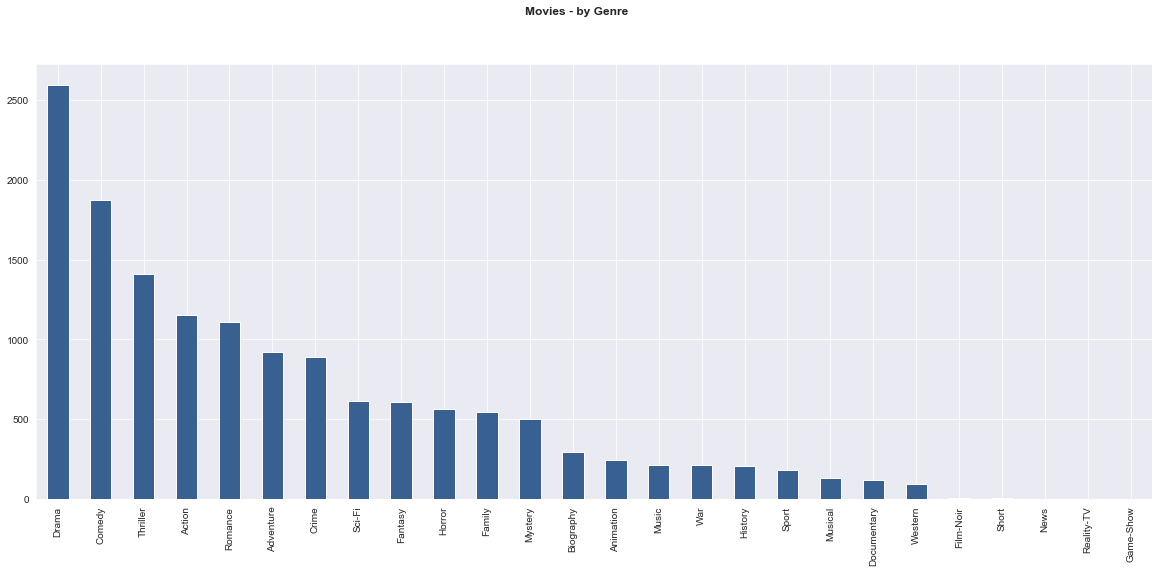

In [16]:
# Plot a bar chart of the number of movies by genre
pd.DataFrame(genre_counts, index=['genres']).T.plot(kind='bar',
                                                    legend=None,
                                                    color='#386191',
                                                    figsize=(20, 8))
plt.suptitle('Movies - by Genre', fontsize=12, fontweight='bold')
plt.show()

In [17]:
# Get a new dataframe containing only the english speaking country's data
eng_countries = ['New Zealand', 'UK', 'Australia', 'USA', 'Canada']
df_english = df[(df['country'].isin(eng_countries))]

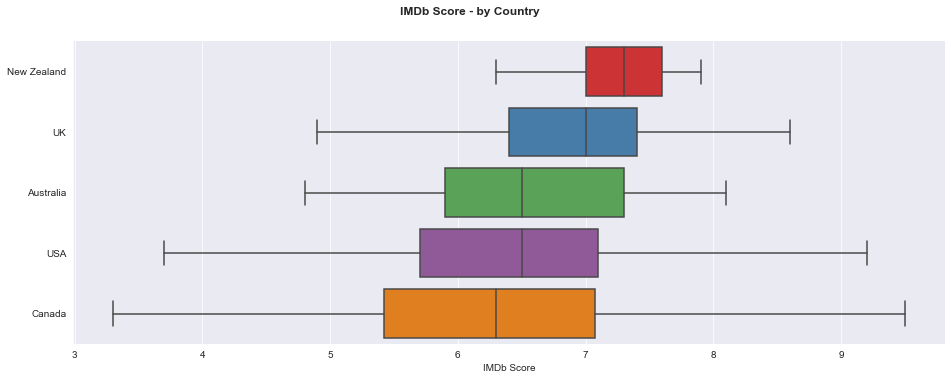

In [18]:
# Set up the box plot with the required logical ordering, size and removal of outliers
imdb_by_ctry = sns.catplot(x='imdb_score',
                           y='country',
                           data=df_english,
                           kind='box',
                           showfliers=False,
                           height=6,
                           aspect=18/8,
                           palette='Set1',
                           order=eng_countries)

# Adjust spacing and set the chart and axe's titles
imdb_by_ctry.fig.subplots_adjust(top=0.9, bottom=0.2)
imdb_by_ctry.fig.suptitle('IMDb Score - by Country',
                          fontsize=12, fontweight='bold')
imdb_by_ctry.set(xlabel='IMDb Score', ylabel='')
plt.show()

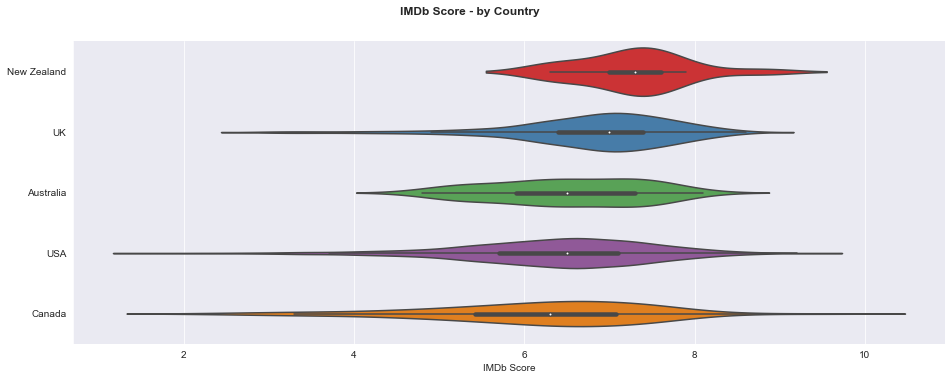

In [19]:
# Set up the violin plot with the required logical ordering, size and inclusion of outliers
imdb_by_ctry = sns.catplot(x='imdb_score',
                           y='country',
                           data=df_english,
                           kind='violin',
                           showfliers=True,
                           height=6,
                           aspect=18/8,
                           palette='Set1',
                           order=eng_countries)

# Adjust spacing and set the chart and axe's titles
imdb_by_ctry.fig.subplots_adjust(top=0.9, bottom=0.2)
imdb_by_ctry.fig.suptitle('IMDb Score - by Country',
                          fontsize=12, fontweight='bold')
imdb_by_ctry.set(xlabel='IMDb Score', ylabel='')
plt.show()